In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../'))
sys.path.insert(1, module_path + "/utils")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
from data_processing import preprocess_climate_data, df_equality

#### data retrieval

In [3]:
url = '../../data/raw/climate/climate-toronto2021-Q1-2024.csv'
climate_df = pd.read_csv(url)
climate_df.rename(columns=lambda x: x.strip().replace(" ", "_").lower(), inplace=True)
climate_df

,x,y,max_rel_humidity,min_temperature_flag,total_rain,min_temperature,id,total_precipitation,min_rel_humidity,mean_temperature_flag,...,snow_on_ground,local_date,total_precipitation_flag,cooling_degree_days_flag,speed_max_gust_flag,local_month,local_day,station_name,min_rel_humidity_flag,heating_degree_days_flag
0,-79.4,43.666667,94.0,NaN,NaN,-1.0,6158355.2021.1.1,6.8,59.0,NaN,...,NaN,2021-01-01 00:00:00,NaN,NaN,M,1,1,TORONTO CITY,NaN,NaN
1,-79.4,43.666667,94.0,NaN,NaN,-0.9,6158355.2021.1.2,10.8,69.0,NaN,...,0.0,2021-01-02 00:00:00,NaN,NaN,M,1,2,TORONTO CITY,NaN,NaN
2,-79.4,43.666667,92.0,NaN,NaN,0.2,6158355.2021.1.3,1.7,77.0,NaN,...,0.0,2021-01-03 00:00:00,NaN,NaN,M,1,3,TORONTO CITY,NaN,NaN
3,-79.4,43.666667,85.0,NaN,NaN,-0.1,6158355.2021.1.4,0.0,79.0,NaN,...,NaN,2021-01-04 00:00:00,NaN,NaN,M,1,4,TORONTO CITY,NaN,NaN
4,-79.4,43.666667,92.0,NaN,NaN,0.6,6158355.2021.1.5,0.4,73.0,NaN,...,NaN,2021-01-05 00:00:00,NaN,NaN,M,1,5,TORONTO CITY,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,-79.4,43.666667,86.0,NaN,NaN,3.6,6158355.2024.3.27,0.4,54.0,NaN,...,NaN,2024-03-27 00:00:00,NaN,NaN,M,3,27,TORONTO CITY,NaN,NaN
1182,-79.4,43.666667,60.0,NaN,NaN,1.7,6158355.2024.3.28,0.0,35.0,NaN,...,NaN,2024-03-28 00:00:00,NaN,NaN,M,3,28,TORONTO CITY,NaN,NaN
1183,-79.4,43.666667,68.0,NaN,NaN,0.5,6158355.2024.3.29,0.0,38.0,NaN,...,NaN,2024-03-29 00:00:00,NaN,NaN,M,3,29,TORONTO CITY,NaN,NaN
1184,-79.4,43.666667,76.0,NaN,NaN,-0.9,6158355.2024.3.30,0.0,38.0,NaN,...,NaN,2024-03-30 00:00:00,NaN,NaN,M,3,30,TORONTO CITY,NaN,NaN


#### column selection

In [4]:
climate_df.isna().sum()/len(climate_df)

x                           0.000000
y                           0.000000
max_rel_humidity            0.004216
min_temperature_flag        0.995784
total_rain                  1.000000
min_temperature             0.004216
id                          0.000000
total_precipitation         0.004216
min_rel_humidity            0.004216
mean_temperature_flag       0.995784
total_snow                  1.000000
mean_temperature            0.004216
direction_max_gust          1.000000
heating_degree_days         0.004216
speed_max_gust              1.000000
max_rel_humidity_flag       0.995784
local_year                  0.000000
total_snow_flag             1.000000
snow_on_ground_flag         1.000000
cooling_degree_days         0.004216
max_temperature_flag        0.995784
total_rain_flag             1.000000
climate_identifier          0.000000
province_code               0.000000
max_temperature             0.004216
direction_max_gust_flag     0.000000
snow_on_ground              0.760540
l

In [5]:
climate_df.dtypes

x                           float64
y                           float64
max_rel_humidity            float64
min_temperature_flag         object
total_rain                  float64
min_temperature             float64
id                           object
total_precipitation         float64
min_rel_humidity            float64
mean_temperature_flag        object
total_snow                  float64
mean_temperature            float64
direction_max_gust          float64
heating_degree_days         float64
speed_max_gust              float64
max_rel_humidity_flag        object
local_year                    int64
total_snow_flag             float64
snow_on_ground_flag         float64
cooling_degree_days         float64
max_temperature_flag         object
total_rain_flag             float64
climate_identifier            int64
province_code                object
max_temperature             float64
direction_max_gust_flag      object
snow_on_ground              float64
local_date                  

##### drop columns that are empty/nan
> - cross checked with the meaning of the columns in [Data Processing](../../data/Data_Processing.md)  
> --> can all be dropped

In [6]:
climate_df.drop(columns=climate_df.columns[climate_df.isnull().mean() == 1], inplace=True)
climate_df.isna().sum()/len(climate_df)

x                           0.000000
y                           0.000000
max_rel_humidity            0.004216
min_temperature_flag        0.995784
min_temperature             0.004216
id                          0.000000
total_precipitation         0.004216
min_rel_humidity            0.004216
mean_temperature_flag       0.995784
mean_temperature            0.004216
heating_degree_days         0.004216
max_rel_humidity_flag       0.995784
local_year                  0.000000
cooling_degree_days         0.004216
max_temperature_flag        0.995784
climate_identifier          0.000000
province_code               0.000000
max_temperature             0.004216
direction_max_gust_flag     0.000000
snow_on_ground              0.760540
local_date                  0.000000
total_precipitation_flag    0.995784
cooling_degree_days_flag    0.995784
speed_max_gust_flag         0.000000
local_month                 0.000000
local_day                   0.000000
station_name                0.000000
m

##### drop columns that are identifiers -- we will map on date with the other dataset 
> - cross checked with the meaning of the columns in [Data Processing](../../data/Data_Processing.md)  

In [7]:
climate_df.drop(columns=climate_df.columns[(climate_df.isnull().mean() == 0) & (climate_df.columns != 'local_date')], inplace=True)
climate_df.isna().sum()/len(climate_df)

max_rel_humidity            0.004216
min_temperature_flag        0.995784
min_temperature             0.004216
total_precipitation         0.004216
min_rel_humidity            0.004216
mean_temperature_flag       0.995784
mean_temperature            0.004216
heating_degree_days         0.004216
max_rel_humidity_flag       0.995784
cooling_degree_days         0.004216
max_temperature_flag        0.995784
max_temperature             0.004216
snow_on_ground              0.760540
local_date                  0.000000
total_precipitation_flag    0.995784
cooling_degree_days_flag    0.995784
min_rel_humidity_flag       0.995784
heating_degree_days_flag    0.995784
dtype: float64

##### drop columns that are redundant/irrelevant bases on use case -- only keeping the relevant one's
> - checked the meaning of the columns in [Data Processing](../../data/Data_Processing.md)  
> - explanation why dropped can be found in [Data Processing](../../data/Data_Processing.md) 

In [8]:
climate_df.isna().sum()/len(climate_df)

max_rel_humidity            0.004216
min_temperature_flag        0.995784
min_temperature             0.004216
total_precipitation         0.004216
min_rel_humidity            0.004216
mean_temperature_flag       0.995784
mean_temperature            0.004216
heating_degree_days         0.004216
max_rel_humidity_flag       0.995784
cooling_degree_days         0.004216
max_temperature_flag        0.995784
max_temperature             0.004216
snow_on_ground              0.760540
local_date                  0.000000
total_precipitation_flag    0.995784
cooling_degree_days_flag    0.995784
min_rel_humidity_flag       0.995784
heating_degree_days_flag    0.995784
dtype: float64

In [9]:
# specifying columns to keep
keep_columns = ['local_date', 'min_temperature', 'heating_degree_days', 'mean_temperature', 'max_temperature', 'cooling_degree_days', 'total_precipitation', 'snow_on_ground']
climate_df = climate_df[keep_columns]
climate_df.head(1)

,local_date,min_temperature,heating_degree_days,mean_temperature,max_temperature,cooling_degree_days,total_precipitation,snow_on_ground
0,2021-01-01 00:00:00,-1.0,17.3,0.7,2.5,0.0,6.8,NaN


In [10]:
climate_df.duplicated().sum()

0

##### look at null values again

In [11]:
climate_df.isna().sum()

local_date               0
min_temperature          5
heating_degree_days      5
mean_temperature         5
max_temperature          5
cooling_degree_days      5
total_precipitation      5
snow_on_ground         902
dtype: int64

#### handle snow_on_ground

In [12]:
climate_df.snow_on_ground.value_counts()

snow_on_ground
0.0     72
1.0     41
3.0     25
2.0     23
4.0     16
8.0     15
6.0     10
14.0     9
20.0     8
7.0      8
9.0      7
21.0     7
5.0      7
18.0     4
17.0     4
10.0     4
11.0     4
19.0     3
13.0     3
24.0     3
16.0     3
12.0     2
25.0     1
32.0     1
30.0     1
23.0     1
22.0     1
15.0     1
Name: count, dtype: int64

> is null when there was none -- replacing with 0

In [13]:
climate_df['snow_on_ground'].fillna(0, inplace=True)
climate_df.isna().sum()

local_date             0
min_temperature        5
heating_degree_days    5
mean_temperature       5
max_temperature        5
cooling_degree_days    5
total_precipitation    5
snow_on_ground         0
dtype: int64

> - I suspect correlations between min_temperature - heating_degree_days and max_temperature - cooling_degree_days  
> - since there is very few nan values I am checking the correlations before handling nan values

#### checking correlations

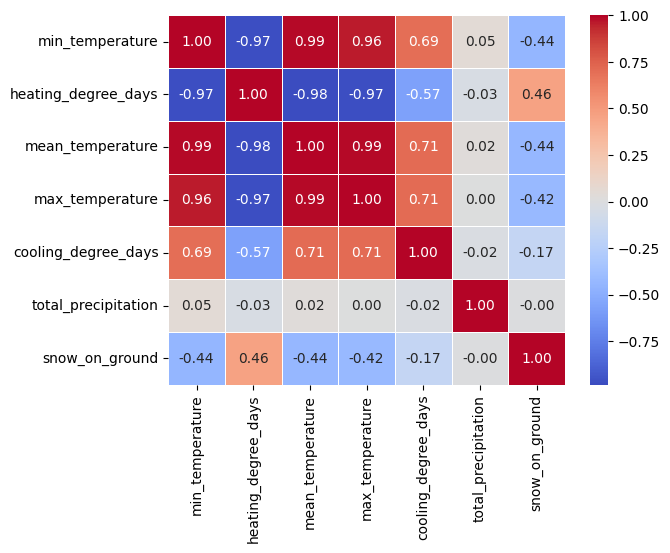

In [14]:
# removing the date column, would throw an error
correlation_matrix = climate_df.loc[:, ~climate_df.columns.str.match('local_date')].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

> - strong correlation between min_temperature - heating_degree_days (-0.97) and max_temperature - cooling_degree_days (0.71)  
-> removing heating_degree_days and cooling_degree_days  
> - I am expecting correlations between min - mean - and max temperature --> will keep it in for now

In [15]:
keep_columns = [col for col in keep_columns if col not in ['heating_degree_days', 'cooling_degree_days']]
climate_df = climate_df[keep_columns]
climate_df

,local_date,min_temperature,mean_temperature,max_temperature,total_precipitation,snow_on_ground
0,2021-01-01 00:00:00,-1.0,0.7,2.5,6.8,0.0
1,2021-01-02 00:00:00,-0.9,0.7,2.2,10.8,0.0
2,2021-01-03 00:00:00,0.2,1.1,2.1,1.7,0.0
3,2021-01-04 00:00:00,-0.1,0.8,1.7,0.0,0.0
4,2021-01-05 00:00:00,0.6,1.1,1.6,0.4,0.0
...,...,...,...,...,...,...
1181,2024-03-27 00:00:00,3.6,7.2,10.7,0.4,0.0
1182,2024-03-28 00:00:00,1.7,5.3,8.8,0.0,0.0
1183,2024-03-29 00:00:00,0.5,4.4,8.3,0.0,0.0
1184,2024-03-30 00:00:00,-0.9,3.3,7.5,0.0,0.0


#### handle missing values

In [16]:
climate_df.isna().sum()

local_date             0
min_temperature        5
mean_temperature       5
max_temperature        5
total_precipitation    5
snow_on_ground         0
dtype: int64

In [17]:
# shwo rows with the nan value to check if they're all in one row -- which yes they are
nan_values = climate_df[climate_df.isna().any(axis=1)]
nan_values

,local_date,min_temperature,mean_temperature,max_temperature,total_precipitation,snow_on_ground
200,2021-07-20 00:00:00,NaN,NaN,NaN,NaN,0.0
304,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,0.0
319,2021-11-16 00:00:00,NaN,NaN,NaN,NaN,0.0
664,2022-10-27 00:00:00,NaN,NaN,NaN,NaN,0.0
1040,2023-11-07 00:00:00,NaN,NaN,NaN,NaN,0.0


In [18]:
# retrieve index to check after fill 
nan_values_index = nan_values.index
nan_values_index

Index([200, 304, 319, 664, 1040], dtype='int64')

#### fill the nan values with the rolling mean with a window of 2 days

In [19]:
# implicitly convert local_date to datetime format 
climate_df['local_date'] = pd.to_datetime(climate_df['local_date'])
# sort by local_date, should be the case already -- making sure the rolling window works 
climate_df.sort_values(by='local_date', inplace=True)
climate_df.reset_index(drop=True)

,local_date,min_temperature,mean_temperature,max_temperature,total_precipitation,snow_on_ground
0,2021-01-01,-1.0,0.7,2.5,6.8,0.0
1,2021-01-02,-0.9,0.7,2.2,10.8,0.0
2,2021-01-03,0.2,1.1,2.1,1.7,0.0
3,2021-01-04,-0.1,0.8,1.7,0.0,0.0
4,2021-01-05,0.6,1.1,1.6,0.4,0.0
...,...,...,...,...,...,...
1181,2024-03-27,3.6,7.2,10.7,0.4,0.0
1182,2024-03-28,1.7,5.3,8.8,0.0,0.0
1183,2024-03-29,0.5,4.4,8.3,0.0,0.0
1184,2024-03-30,-0.9,3.3,7.5,0.0,0.0


In [20]:
columns_with_nan = climate_df.columns[climate_df.isna().any()].tolist()
# Fill NaN values in var_list using rolling mean with window size of 2 and min_periods=1
climate_df[columns_with_nan] = climate_df[columns_with_nan].fillna(climate_df[columns_with_nan].rolling(window=2, min_periods=1).mean())

In [21]:
# validate entires 
climate_df.iloc[nan_values.index]

,local_date,min_temperature,mean_temperature,max_temperature,total_precipitation,snow_on_ground
200,2021-07-20,20.4,25.2,30.0,0.0,0.0
304,2021-11-01,8.1,11.7,15.3,0.0,0.0
319,2021-11-16,1.3,3.6,5.9,0.7,0.0
664,2022-10-27,7.6,11.7,15.9,7.9,0.0
1040,2023-11-07,8.4,10.3,12.2,4.7,0.0


#### check dataset

In [22]:
climate_df

,local_date,min_temperature,mean_temperature,max_temperature,total_precipitation,snow_on_ground
0,2021-01-01,-1.0,0.7,2.5,6.8,0.0
1,2021-01-02,-0.9,0.7,2.2,10.8,0.0
2,2021-01-03,0.2,1.1,2.1,1.7,0.0
3,2021-01-04,-0.1,0.8,1.7,0.0,0.0
4,2021-01-05,0.6,1.1,1.6,0.4,0.0
...,...,...,...,...,...,...
1181,2024-03-27,3.6,7.2,10.7,0.4,0.0
1182,2024-03-28,1.7,5.3,8.8,0.0,0.0
1183,2024-03-29,0.5,4.4,8.3,0.0,0.0
1184,2024-03-30,-0.9,3.3,7.5,0.0,0.0


In [23]:
# rename 
# change format 
climate_df['local_date'] = pd.to_datetime(climate_df['local_date'])
climate_df.sort_values(by='local_date', inplace=True)
climate_df['local_date'] = climate_df['local_date'].dt.strftime('%d.%m.%y')
climate_df.rename(columns={'local_date': 'date'}, inplace=True)


In [24]:
climate_df = climate_df[['min_temperature', 'mean_temperature', 'max_temperature',
       'total_precipitation', 'snow_on_ground', 'date']]

In [25]:
climate_df.dtypes

min_temperature        float64
mean_temperature       float64
max_temperature        float64
total_precipitation    float64
snow_on_ground         float64
date                    object
dtype: object

In [26]:
# validating all nan values are filled 
climate_df.isna().sum().sum() == 0

True

In [27]:
keep_columns

['local_date',
 'min_temperature',
 'mean_temperature',
 'max_temperature',
 'total_precipitation',
 'snow_on_ground']

In [28]:
climate_df

,min_temperature,mean_temperature,max_temperature,total_precipitation,snow_on_ground,date
0,-1.0,0.7,2.5,6.8,0.0,01.01.21
1,-0.9,0.7,2.2,10.8,0.0,02.01.21
2,0.2,1.1,2.1,1.7,0.0,03.01.21
3,-0.1,0.8,1.7,0.0,0.0,04.01.21
4,0.6,1.1,1.6,0.4,0.0,05.01.21
...,...,...,...,...,...,...
1181,3.6,7.2,10.7,0.4,0.0,27.03.24
1182,1.7,5.3,8.8,0.0,0.0,28.03.24
1183,0.5,4.4,8.3,0.0,0.0,29.03.24
1184,-0.9,3.3,7.5,0.0,0.0,30.03.24


In [29]:
preprocess_climate_data(url)

,min_temperature,total_precipitation,mean_temperature,max_temperature,snow_on_ground,date
0,-1.0,6.8,0.7,2.5,0.0,01.01.21
1,-0.9,10.8,0.7,2.2,0.0,02.01.21
2,0.2,1.7,1.1,2.1,0.0,03.01.21
3,-0.1,0.0,0.8,1.7,0.0,04.01.21
4,0.6,0.4,1.1,1.6,0.0,05.01.21
...,...,...,...,...,...,...
1181,3.6,0.4,7.2,10.7,0.0,27.03.24
1182,1.7,0.0,5.3,8.8,0.0,28.03.24
1183,0.5,0.0,4.4,8.3,0.0,29.03.24
1184,-0.9,0.0,3.3,7.5,0.0,30.03.24


In [30]:
preprocess_climate_data(url).dtypes

min_temperature        float64
total_precipitation    float64
mean_temperature       float64
max_temperature        float64
snow_on_ground         float64
date                    object
dtype: object

#### validate function 

In [31]:
df_equality(preprocess_climate_data(url), climate_df)

True

#### write to csv

In [32]:
preprocess_climate_data(url).to_csv('../../data/processed/climate.csv', index=False)